**NAME : SANKALPA V.L.T.**

**REG No. : EG/2015/2757**

---

# Q1 
## part 1 :- Identifing outlier trades based on Executed Price & Executed Qty using Hierarchical Clustering


In [3]:
# Importing the libraries

import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
# Upload Trade.csv file to google colab
uploaded = files.upload()

Saving Trades.csv to Trades.csv


### Data preprocessing

In [4]:
# Importing the trades data as pandas DataFrame
dataset = pd.read_csv('Trades.csv')
# Filtering the trades of stock ES0158252033 and create a new DataFrame
Trades = dataset.loc[dataset.Stock=='ES0158252033', :]
# Add indexing column to Dataframe (Lets consider this index represent the Trade Date)
Trades['Index'] = range(1, len(Trades) + 1)
# Create NumPy array with Execute Qty and Execute Price of Trades
X = Trades.iloc[:, [ 1, 2]].values

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [5]:
dataset

,Trade Date,Executed Qty,Executed Price,Stock,Buy Order ID,Sell Order ID,Sell Broker ID,Buy Broker ID
0,01JUL2014:09:00:00,1,3.09,BE0160342011,10442101280,10442101281,B11293128,B11293128
1,01JUL2014:09:00:00,1,34.30,CH0008853209,10442101321,10442101322,A170820,A170820
2,01JUL2014:09:00:00,1,2.96,ES0109429037,10442101354,10442101355,B169653,B169653
3,01JUL2014:09:00:00,1,19.71,ES0158252033,10442111564,10442101372,A163878,B204480
4,01JUL2014:09:00:00,1,19.71,ES0158252033,10442101373,10442101368,A2007006,A163878
5,01JUL2014:09:00:00,2,19.71,ES0158252033,10442111564,10442101377,B133386,B204480
6,01JUL2014:09:00:00,6,19.71,ES0158252033,10442101375,10442101359,B128778,B128778
7,01JUL2014:09:00:00,12,19.71,ES0158252033,10442101383,10442101368,A2007006,C439398190
8,01JUL2014:09:00:00,18,19.71,ES0158252033,10442101367,10442101368,A2007006,C424759231
9,01JUL2014:09:00:00,44,19.71,ES0158252033,10442101375,10442101368,A2007006,B128778


In [6]:
Trades

,Trade Date,Executed Qty,Executed Price,Stock,Buy Order ID,Sell Order ID,Sell Broker ID,Buy Broker ID,Index
3,01JUL2014:09:00:00,1,19.71,ES0158252033,10442111564,10442101372,A163878,B204480,1
4,01JUL2014:09:00:00,1,19.71,ES0158252033,10442101373,10442101368,A2007006,A163878,2
5,01JUL2014:09:00:00,2,19.71,ES0158252033,10442111564,10442101377,B133386,B204480,3
6,01JUL2014:09:00:00,6,19.71,ES0158252033,10442101375,10442101359,B128778,B128778,4
7,01JUL2014:09:00:00,12,19.71,ES0158252033,10442101383,10442101368,A2007006,C439398190,5
8,01JUL2014:09:00:00,18,19.71,ES0158252033,10442101367,10442101368,A2007006,C424759231,6
9,01JUL2014:09:00:00,44,19.71,ES0158252033,10442101375,10442101368,A2007006,B128778,7
10,01JUL2014:09:00:00,75,19.71,ES0158252033,10442111564,10442101368,A2007006,B204480,8
11,01JUL2014:09:00:03,14,20.60,ES0158252033,10434416337,10442101363,C8329321,C11084986,9
12,01JUL2014:09:00:03,64,20.40,ES0158252033,10442101384,10427330904,C9324721,A8605026,10


In [15]:
X

array([[  1.  ,  19.71],
       [  1.  ,  19.71],
       [  2.  ,  19.71],
       ...,
       [200.  ,  10.71],
       [200.  ,  10.71],
       [179.  ,  10.71]])

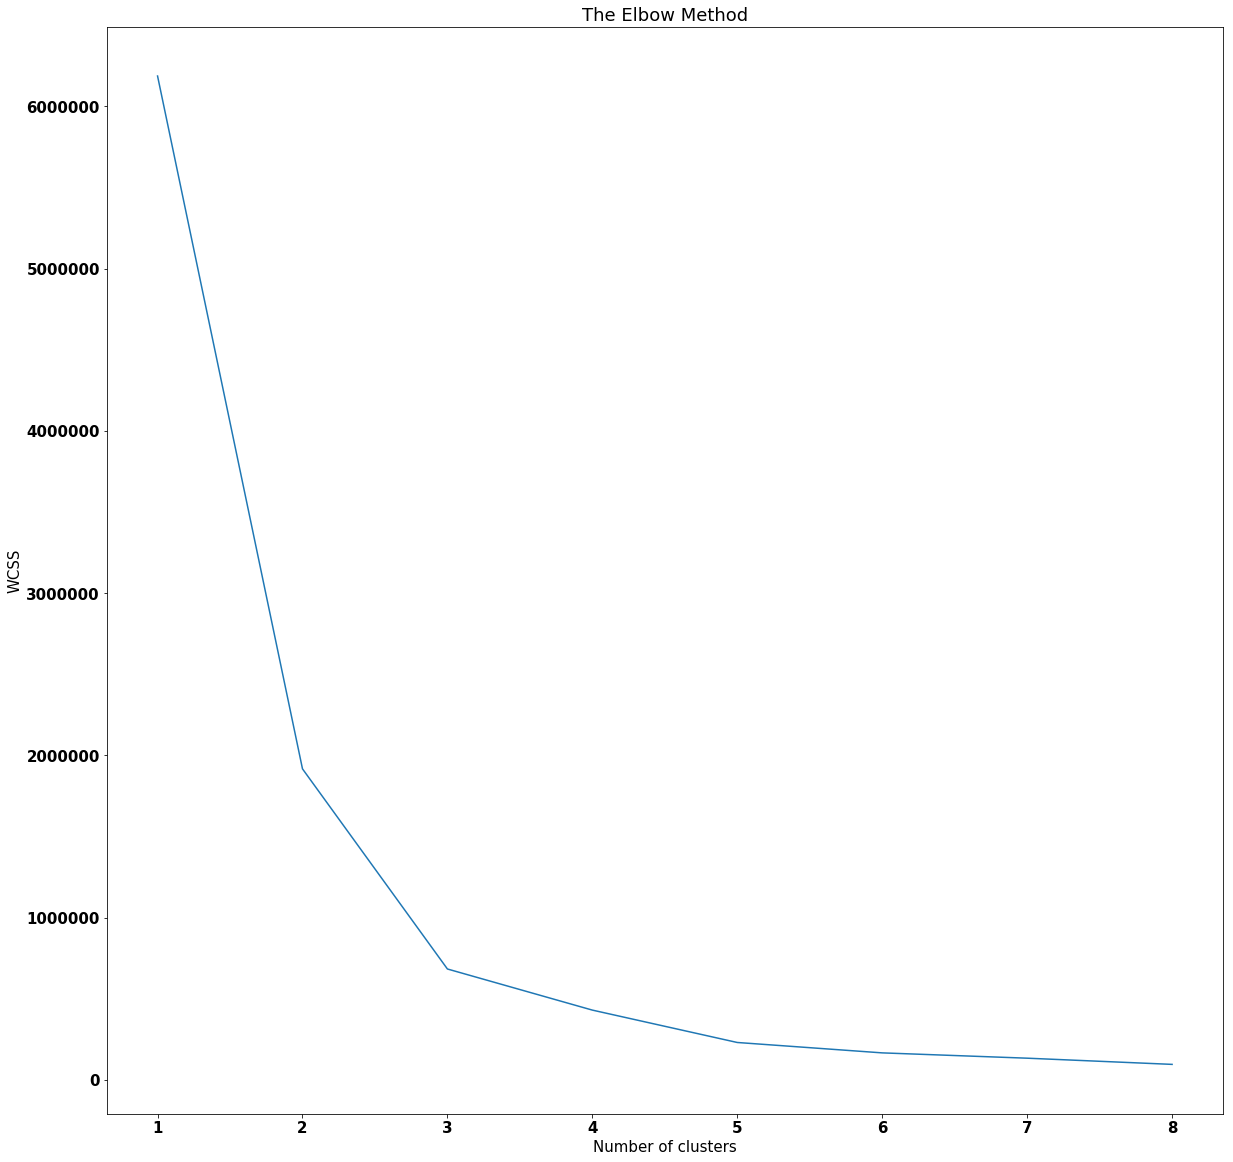

In [20]:
# change the font siXe on a matplotlib plot
font = {'family' : 'normal','weight' : 'bold','size'   : 15}
plt.rc('font', **font)

# change the graph siXe of a matplotlib plot
plt.rcParams['figure.figsize'] = (20, 20)

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 9), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Using the dendrogram to find the optimal number of clusters suitable to identify outliners
Since the main point of Hierarchical Clustering is to make the dendrogram, because you need to start with one single cluster, then work your way down to see the diﬀerent combinations of clusters until having a number of clusters equal to the number of observations. Therefore in order to double check the optimal number of clusters its possible to use **dendrogram**.The dendrogram itself that allows to ﬁnd the best clustering conﬁguration.



/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


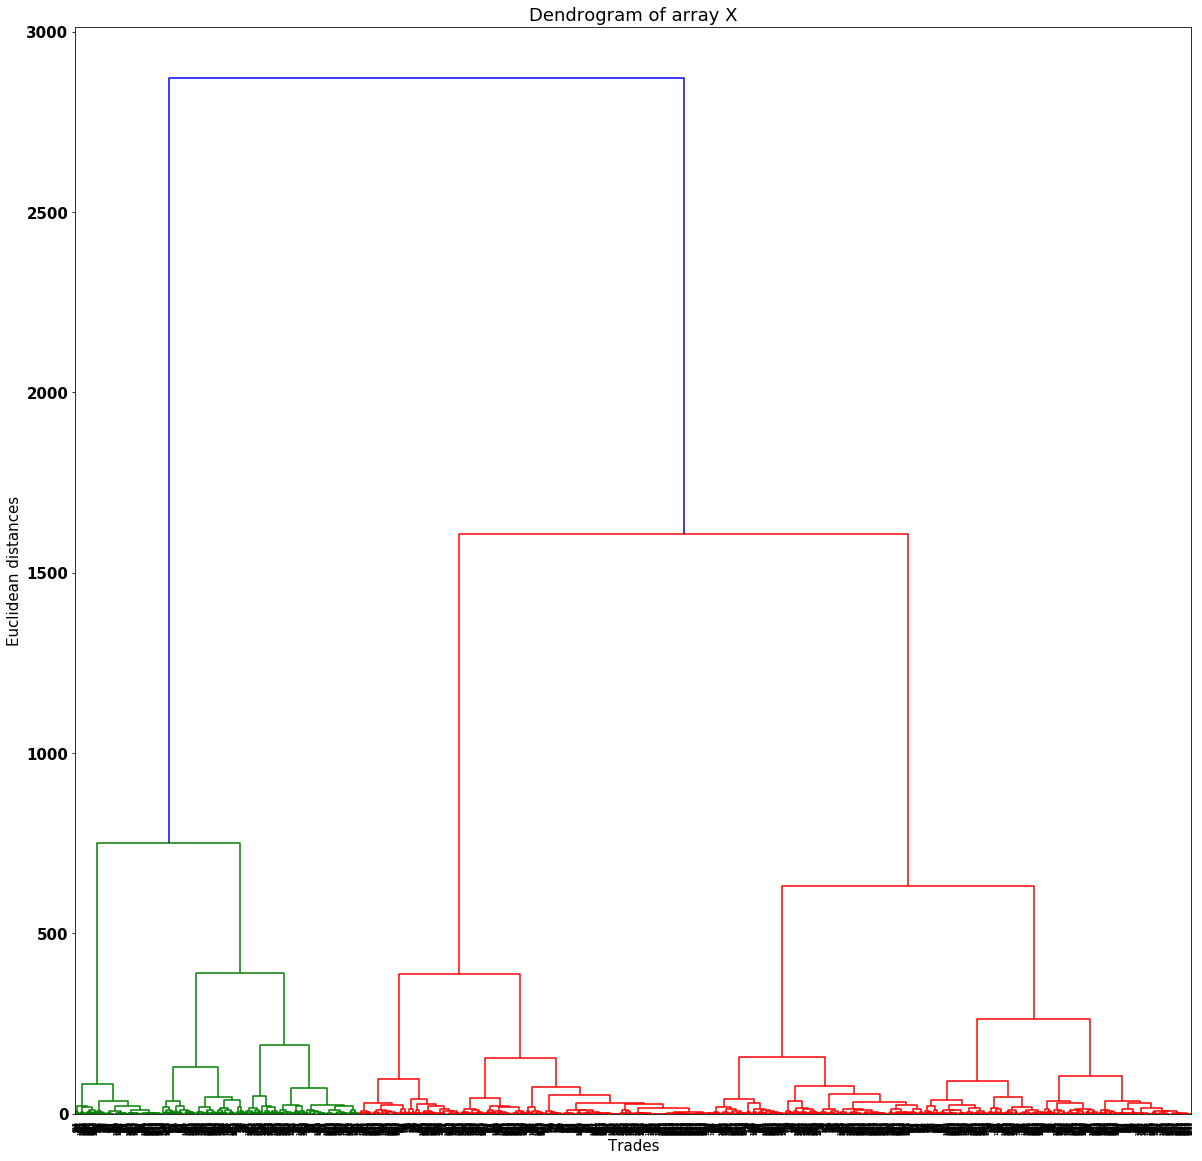

In [21]:
# plot dendrogram for X array
dendrogram_X = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram of array X')
plt.xlabel('Trades')
plt.ylabel('Euclidean distances')
plt.show()

## Apply Hierarchical Clustering

by drawing line across 500 euclidean distance it possible to determine the optimal number of clusters as five clusters

In [7]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
# Create Array with clusters
X_hc = hc.fit_predict(X)
# Add a X_hc array as Cluster column to a Trades dataframe
Trades['Cluster'] = X_hc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [8]:
Trades

,Trade Date,Executed Qty,Executed Price,Stock,Buy Order ID,Sell Order ID,Sell Broker ID,Buy Broker ID,Index,Cluster
3,01JUL2014:09:00:00,1,19.71,ES0158252033,10442111564,10442101372,A163878,B204480,1,4
4,01JUL2014:09:00:00,1,19.71,ES0158252033,10442101373,10442101368,A2007006,A163878,2,4
5,01JUL2014:09:00:00,2,19.71,ES0158252033,10442111564,10442101377,B133386,B204480,3,4
6,01JUL2014:09:00:00,6,19.71,ES0158252033,10442101375,10442101359,B128778,B128778,4,4
7,01JUL2014:09:00:00,12,19.71,ES0158252033,10442101383,10442101368,A2007006,C439398190,5,4
8,01JUL2014:09:00:00,18,19.71,ES0158252033,10442101367,10442101368,A2007006,C424759231,6,4
9,01JUL2014:09:00:00,44,19.71,ES0158252033,10442101375,10442101368,A2007006,B128778,7,1
10,01JUL2014:09:00:00,75,19.71,ES0158252033,10442111564,10442101368,A2007006,B204480,8,2
11,01JUL2014:09:00:03,14,20.60,ES0158252033,10434416337,10442101363,C8329321,C11084986,9,4
12,01JUL2014:09:00:03,64,20.40,ES0158252033,10442101384,10427330904,C9324721,A8605026,10,2


# Visualising the clusters

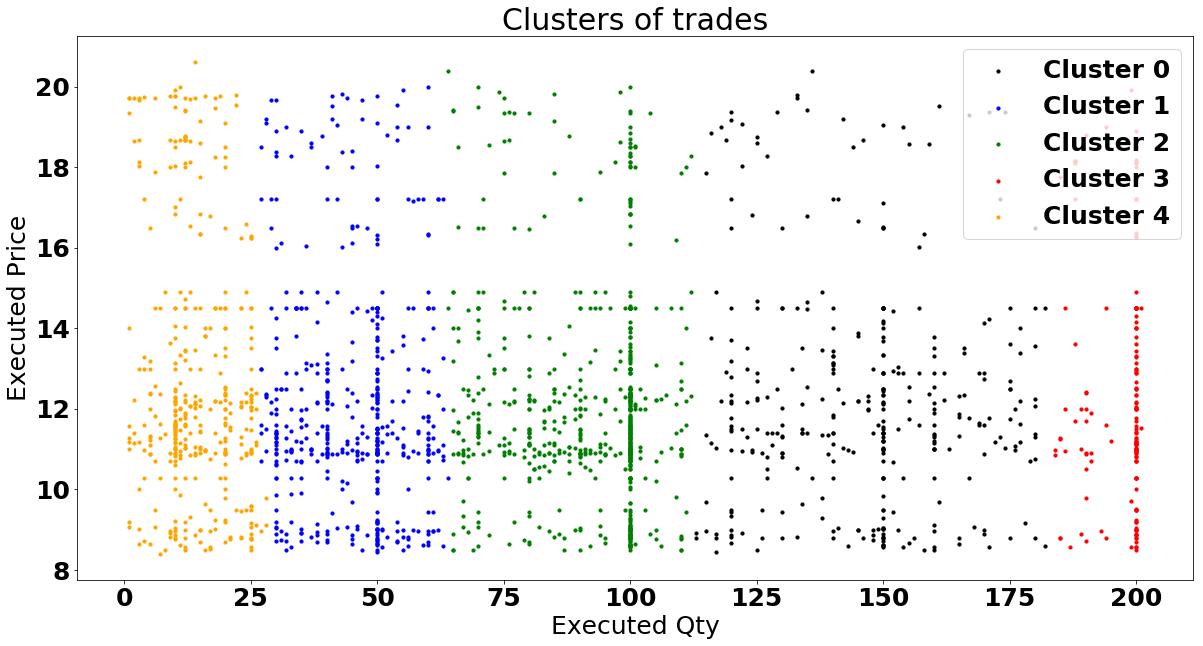

In [11]:
# change the graph size of a matplotlib plot
plt.rcParams['figure.figsize'] = (20, 10)
# Visualising the clusters
plt.scatter(X[X_hc == 0, 0], X[X_hc == 0, 1], s = 10, c = 'black', label = 'Cluster 0')
plt.scatter(X[X_hc == 1, 0], X[X_hc == 1, 1], s = 10, c = 'blue', label = 'Cluster 1')
plt.scatter(X[X_hc == 2, 0], X[X_hc == 2, 1], s = 10, c = 'green', label = 'Cluster 2')
plt.scatter(X[X_hc == 3, 0], X[X_hc == 3, 1], s = 10, c = 'red', label = 'Cluster 3')
plt.scatter(X[X_hc == 4, 0], X[X_hc == 4, 1], s = 10, c = 'orange', label = 'Cluster 4')
plt.title('Clusters of trades')
plt.xlabel('Executed Qty')
plt.ylabel('Executed Price')
plt.legend()
plt.show()

# Calculating statistical information of clusters
Use group by pandas aggregate to calculate statistical information of clusters based on Executed Qty, Executed price and index (this index represent the Trade date)

In [0]:
Cluster_Statistics_Qty = Trades.groupby("Cluster")['Executed Qty'].describe()

Cluster_Statistics_Price = Trades.groupby("Cluster")['Executed Price'].describe()

Cluster_Statistics_index = Trades.groupby("Cluster")['Index'].describe()

In [13]:
Cluster_Statistics_Qty

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,349.0,145.919771,17.744495,113.0,130.0,150.0,159.0,182.0
1,474.0,45.008439,10.001053,27.0,36.0,47.0,50.0,64.0
2,628.0,91.237261,12.464409,64.0,81.0,100.0,100.0,112.0
3,154.0,197.201299,5.036312,184.0,196.0,200.0,200.0,201.0
4,375.0,14.141333,6.815661,1.0,10.0,13.0,20.0,28.0


In [14]:
Cluster_Statistics_Price

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,349.0,12.273496,2.785368,8.45,10.71,11.77,13.4000,20.40
1,474.0,12.269156,2.840596,8.45,10.71,11.45,13.5075,19.99
2,628.0,12.174220,2.628834,8.50,10.82,11.55,13.0000,20.40
3,154.0,12.382532,2.946642,8.51,10.71,11.55,14.0000,19.92
4,375.0,12.752480,3.198436,8.41,10.90,11.89,14.2750,20.60


In [15]:
Cluster_Statistics_index

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,349.0,948.501433,530.935704,12.0,509.00,939.0,1378.00,1980.0
1,474.0,990.428270,573.933960,7.0,496.50,982.5,1484.75,1970.0
2,628.0,1040.581210,573.512601,8.0,531.75,1057.5,1542.75,1974.0
3,154.0,960.935065,572.591103,20.0,492.00,930.0,1401.50,1979.0
4,375.0,957.949333,598.225536,1.0,442.50,969.0,1501.50,1964.0


In statistics, an outlier is a data point that differs significantly from other observations. By observing cluster visualization scatter plot and above cluster statistics it’s possible to notice that cluster 3 (brown colour in scatter plot) has lowest data-point (154 data points) count comparing with other clusters. This makes cluster 3-outlier cluster. Finally its feasible to concluded all the trade that enrol executed qty between 184 and 201 are outlier trades. 